# 1. Load Training and Test Data from kaggel site

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

# 2. Not all the Training images have the facial keypoint features
### 2.1 Only 2,140 images have all features (facial keypoint coordinates available)

Training Data Variables and count


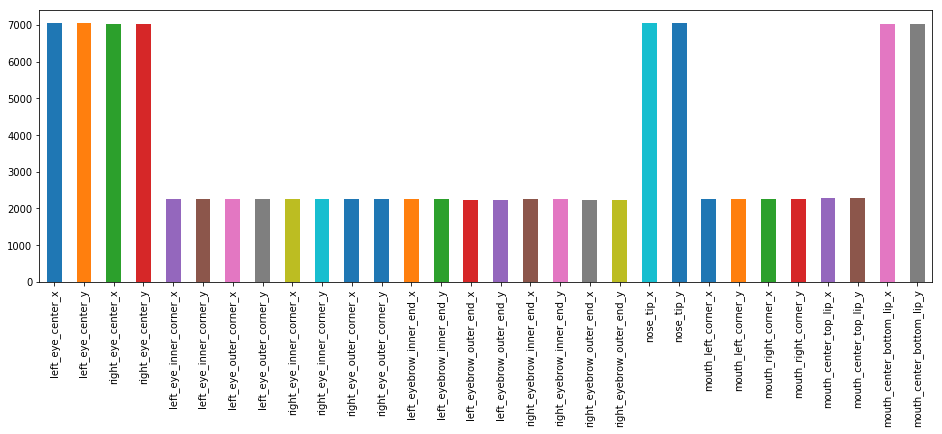

In [377]:
print('Training Data Variables and count')
plt.figure(figsize=(16,5))
train_data.describe().loc['count'].plot.bar()
plt.show()

## 2.2 For baseline analysis, retain only those images that have all keypoint coordinates available in the training data
#### 2.2.1 Also, seperate out the image pixle values from space seperated value to coma seperated array/ list

In [378]:
#Seperate out the image pixle values into a comma seperated array 
train_data['Image'] = test_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)

#### 2.2.2 Create a list of all features, one for x and another for y coordinates

In [379]:
#Train data output field
output_field_x = ['left_eye_center_x','right_eye_center_x',
'left_eye_inner_corner_x','left_eye_outer_corner_x','right_eye_inner_corner_x','right_eye_outer_corner_x',
'left_eyebrow_inner_end_x','left_eyebrow_outer_end_x','right_eyebrow_inner_end_x','right_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_left_corner_x','mouth_right_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
output_field_y = ['left_eye_center_y','right_eye_center_y',
'left_eye_inner_corner_y','left_eye_outer_corner_y','right_eye_inner_corner_y','right_eye_outer_corner_y',
'left_eyebrow_inner_end_y','left_eyebrow_outer_end_y','right_eyebrow_inner_end_y','right_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_left_corner_y','mouth_right_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']
# Flip data output field
flip_output_field_x = ['right_eye_center_x','left_eye_center_x',
'right_eye_inner_corner_x','right_eye_outer_corner_x','left_eye_inner_corner_x','left_eye_outer_corner_x',
'right_eyebrow_inner_end_x','right_eyebrow_outer_end_x','left_eyebrow_inner_end_x','left_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_right_corner_x','mouth_left_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
flip_output_field_y = ['right_eye_center_y','left_eye_center_y',
'right_eye_inner_corner_y','right_eye_outer_corner_y','left_eye_inner_corner_y','left_eye_outer_corner_y',
'right_eyebrow_inner_end_y','right_eyebrow_outer_end_y','left_eyebrow_inner_end_y','left_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_right_corner_y','mouth_left_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']

## 2.3 Since we only 2,140 images for training and testing baseline assumptions, we have created 2,140 more images by simply flipping the image on y-axis

In [460]:
# FLIP TRAINING IMAGES
flip_train_data = train_data.copy()
print(len(flip_train_data))
for x1,x2 in zip(output_field_x,flip_output_field_x):
    flip_train_data[x2] = 95-train_data[x1]
for y1,y2 in zip(output_field_y,flip_output_field_y):
    flip_train_data[y2] = train_data[y1]

flipped_image_list = []
for i in range(len(flip_train_data)):
    flipped_image_list.append(np.flip(flip_train_data['Image'][i].reshape(96,96),1).reshape(96*96))
new_df = pd.DataFrame({'Image': flipped_image_list})
flip_train_data.update(new_df)
flip_train_data.describe().loc[['mean']]

2140


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
mean,65.359731,37.063815,28.778451,36.842274,58.396893,37.920852,72.638383,38.034571,35.727872,37.856014,...,47.047859,57.253926,62.032635,76.134065,31.580924,75.88766,46.918675,72.681125,46.850346,82.630412


Print a sample image from training data


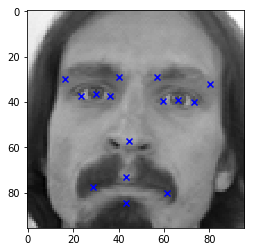

In [461]:
print('Print a sample image from training data')
plt.imshow((train_data['Image'][0]).reshape(96,96),cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

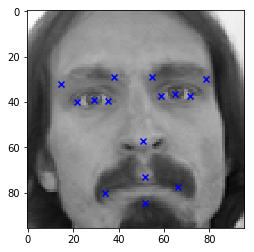

In [462]:
flip_im = flip_train_data['Image'][0].reshape(96,96)
plt.imshow(flip_im,cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = 95-train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

# 3. Split 4,280 training images into 80% Training and 20% Test data

In [463]:
#APPEND AND SHUFFLE TRAINING DATA AND FLIPPED TRAINING DATA
train_data_extended = train_data.append(flip_train_data).sample(frac=1).reset_index(drop=True)
baseline_train = train_data_extended.loc[np.arange(0,int(0.8*len(train_data_extended)))].reset_index(drop=True)
avg_train_x_y = baseline_train.describe().loc[['mean']]
baseline_test = train_data_extended.loc[np.arange(int(0.8*len(train_data_extended)),len(train_data_extended))].reset_index(drop=True)

# 4. We are simply going to take an average of all keypoint cordinates from training data set to be the predicted keypoint cordinates

In [464]:
print('Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint')
avg_train_x_y.transpose()

Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint


,mean
left_eye_center_x,65.778620
left_eye_center_y,36.944408
right_eye_center_x,29.186615
right_eye_center_y,36.947134
left_eye_inner_corner_x,58.823596
left_eye_inner_corner_y,37.888952
left_eye_outer_corner_x,73.027827
left_eye_outer_corner_y,37.824906
right_eye_inner_corner_x,36.147022
right_eye_inner_corner_y,37.889447


# 5. Use the predicted keypoint cordinates to find RMSE through comparison with the actual keypoints from the dev data

In [465]:
import math
SS_dist = []
for i in range(len(baseline_test)):
    L2_dist = []
    for x,y in zip(output_field_x,output_field_y):
        x_dist = (baseline_test[x][i]-avg_train_x_y[x][0])**2
        y_dist = (baseline_test[y][i]-avg_train_x_y[y][0])**2
        L2_dist.append(math.sqrt(x_dist+y_dist))
        
    SS_dist.append(L2_dist)

SS_DF = pd.DataFrame(data=SS_dist,columns=output_field_x)
SS_DF_mean = pd.DataFrame(data=SS_dist,columns=output_field_x).describe().loc[['mean']]
print('Mean pixle distance between the actual and predicted facial keypoints:')
SS_DF_mean.loc['mean']

Mean pixle distance between the actual and predicted facial keypoints:


left_eye_center_x            2.555392
right_eye_center_x           2.600320
left_eye_inner_corner_x      2.331133
left_eye_outer_corner_x      3.244127
right_eye_inner_corner_x     2.410923
right_eye_outer_corner_x     3.243855
left_eyebrow_inner_end_x     3.350343
left_eyebrow_outer_end_x     4.136660
right_eyebrow_inner_end_x    3.325176
right_eyebrow_outer_end_x    4.158477
nose_tip_x                   4.583643
mouth_left_corner_x          4.847691
mouth_right_corner_x         4.952156
mouth_center_top_lip_x       4.848042
mouth_center_bottom_lip_x    4.984605
Name: mean, dtype: float64

In [466]:
SS_DF['RMSE'] = SS_DF.sum(axis = 1, skipna = True)

# 5.1 Images with highest RMSE

In [467]:
print('Top 5 images with highest RMSE')
SS_DF.sort_values(by = ['RMSE'], ascending=False)[0:5]

Top 5 images with highest RMSE


,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,RMSE
707,11.288545,6.339273,10.148796,15.039040,3.764050,9.015409,8.379702,16.910444,2.182778,13.478474,17.600399,24.363394,20.080269,21.557210,29.138294,209.286079
370,8.592409,8.413372,6.407836,11.639671,3.741849,11.109693,9.867895,15.302196,4.435482,14.663742,5.603900,15.013858,16.858281,13.089109,17.736253,162.475547
556,13.049619,5.354998,5.078254,14.621405,6.544175,3.096194,3.149683,12.698938,1.048295,10.112299,6.812275,22.707541,17.758734,21.419379,13.267951,156.719742
487,4.388454,8.803999,1.957980,7.218522,5.043278,9.516889,8.071592,12.659779,10.092206,9.647434,3.500203,16.320733,19.196589,14.458209,18.378077,149.253945
439,10.986418,7.397226,5.450125,11.264620,6.182283,3.356293,6.896186,11.119605,3.268148,6.564744,9.709371,23.743742,19.126312,11.438223,12.330226,148.833522


Print a sample image with highest RMSE
Blue: Actual
Red: Predicted


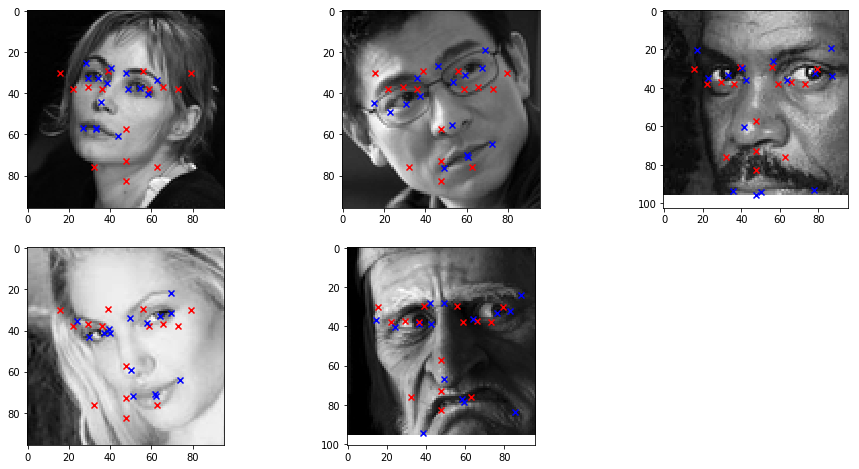

In [468]:
print('Print a sample image with highest RMSE\nBlue: Actual\nRed: Predicted')
plt.figure(figsize=(16,8))
count=0
for i in SS_DF.sort_values(by = ['RMSE'], ascending=False)[0:5].index:
    count=count+1
    plt.subplot(2,3,count)
    plt.imshow((baseline_test['Image'][i]).reshape(96,96),cmap='gray')
    for x,y in zip(output_field_x,output_field_y):
        X1 = avg_train_x_y[x][0]
        Y1 = avg_train_x_y[y][0]
        X2 = baseline_test[x][i]
        Y2 = baseline_test[y][i]
        plt.scatter(X1,Y1,marker='x',color='red')
        plt.scatter(X2,Y2,marker='x',color='blue')
plt.show()

In [470]:
print('Overall RMSE for the Facial keypoint analysis baseline is: '
      +str(round(math.sqrt(((SS_DF['RMSE']**2)/15).sum(axis = 0, skipna = True)/len(SS_DF)),2)))

Overall RMSE for the Facial keypoint analysis baseline is: 15.61
